# Set up

Prior to Python, I had only used R, so I was surprised to learn that you need to import libraries for routine tasks like handling a dataframe, doing vectorized math, and data visualization. This is what we are doing below.

In [1]:
# Standard data science libraries
# Used for dataframes
import pandas as pd
# Used for doing math
import numpy as np
# Used for visualization
import matplotlib.pyplot as plt

# Making the plot show within our notebook
%matplotlib inline

# Allowing us to set the plot size
import pylab
pylab.rcParams['figure.figsize'] = (10, 10)

This makes Python read our data table

In [2]:
# Importing the csv
climate_essay_df = pd.read_csv('data_noID.csv')

# How big is this dataframe
climate_essay_df.shape

(1793, 104)

That's a lot of columns to deal with...
<br>Let's focus on the essays written about climate change and the respondants' education and essay

In [3]:
subsetted_df = climate_essay_df[climate_essay_df['trt1'] == 1]
subsetted_df = subsetted_df[['trt1', 'educ', 'essay']]
subsetted_df.shape

(589, 3)

In [4]:
subsetted_df.head(5)

,trt1,educ,essay
0,1,High school diploma or equivalent,"Dear Adelyn, \n Today is January 7, 2015. I kn..."
6,1,Bachelors degree,To whom it may concern in 2050:\n\nThis is 201...
7,1,High school diploma or equivalent,"Dear son,\n This is your mother from 2015 w..."
11,1,High school diploma or equivalent,"Dear J-Swag,\n I want you to know how much I l..."
13,1,Bachelors degree,"Dear Kailey,\nYou will be reading this in the ..."


In [5]:
subsetted_df['educ'].unique()

array(['High school diploma or equivalent', 'Bachelors degree',
       'Associate degree', 'Trade school degree or certificate',
       'Graduate degree (Masters, PhD, MD, JD, etc)',
       'Less than high school diploma or equivalent', nan], dtype=object)

In [6]:
for i in subsetted_df['educ'].unique():
    print(i)

High school diploma or equivalent
Bachelors degree
Associate degree
Trade school degree or certificate
Graduate degree (Masters, PhD, MD, JD, etc)
Less than high school diploma or equivalent
nan


In [7]:
subsetted_df['educ'] = subsetted_df['educ'].astype(str)
subsetted_df = subsetted_df[subsetted_df['educ'] != 'nan']
subsetted_df = subsetted_df.reset_index(drop = True)

In [8]:
translate_dictionary = {'Bachelors degree' : 1,
                        'Graduate degree (Masters, PhD, MD, JD, etc)' : 1,
                        'High school diploma or equivalent' : 0,
                        'Associate degree' : 0,
                        'Trade school degree or certificate' : 0,
                        'Less than high school diploma or equivalent': 0}

In [9]:
subsetted_df = subsetted_df.replace({'educ':translate_dictionary})
pd.DataFrame(subsetted_df['educ'].value_counts())

,educ
1,300
0,284


# Exploratory Data Analysis

What does this text look like? Well it's stored in the `essay` column, so let's view a random entry

In [10]:
random_row = np.random.choice(len(subsetted_df))

subsetted_df['essay'][random_row]

"I at the moment haven't taken any action on climate change.  I believe the earth is changing but I do not believe that climate change is as the world is having us believe it.  I believe that with anything that their are consequences. I believe that if we don't take care of earth that there will be some negative consequences. I feel like it is a way to control what it is we do more than ever.  It is a way to either make you spend more money or do what they say you must do.  I don't think all the ideas are bad but making us spend more money as a nation when we are a trillion dollars in debt is ridiculous.  Just like the same people that make the laws want you to do, most of the time they are not willing to do in their own homes.  I feel as though this is all about money and or power and really nothing to do with climate change.  Climate change is something else to take our minds off of what they want us to miss.  I'm all for making change to spend less oil and gas so that less drilling 

Let's figure out how many words people wrote for the essays

In [11]:
# Creating an empty vector to store word counts in
word_counts_list = []

# For-looping over all the rows
for row in range(len(subsetted_df)):
    # Storing the text from each row
    sentence = subsetted_df['essay'][row]
    # Splitting the string vector into a list of individual words
    words = sentence.split()
    # Getting the length of that list
    word_count = len(words)
    # Appending that to our growing list
    word_counts_list.append(word_count)

Plot the word counts

(array([168., 203., 118.,  58.,  16.,  10.,   4.,   3.,   3.,   1.]),
 array([ 84., 139., 194., 249., 304., 359., 414., 469., 524., 579., 634.]),
 <a list of 10 Patch objects>)

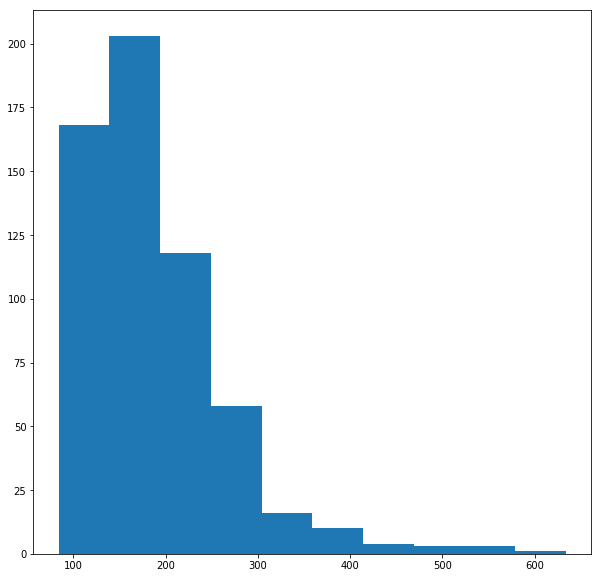

In [12]:
# View the distribution of word counts within essays
plt.hist(word_counts_list)

That's kind of ugly, and what's up with all those arrays and numbers?
<br>Let's clean this up a little bit

The average number of words written is 186.330479


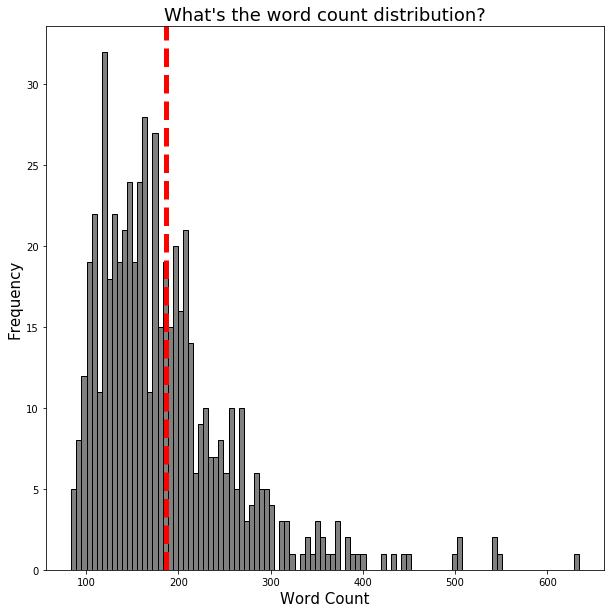

In [13]:
average_word_count = np.mean(word_counts_list)
print('The average number of words written is %0.6f' % average_word_count)

plt.hist(word_counts_list, bins = 100, color = 'grey', edgecolor = 'black')
plt.xlabel('Word Count', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title("What's the word count distribution?", fontsize = 18)
plt.axvline(x = average_word_count, lw = 5, color = 'red', linestyle = '--');

# Text Processing

Some additional library importing

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

Data split for evaluation

In [15]:
train_df, test_df = train_test_split(subsetted_df, test_size = 0.2)

Some data conversion
<br>The essays are currently in a Panda's DataFrame column, it would be more reasonable to have them as a vector (`np.ndarray`) of strings. This data structure carries less formatting and is more generalizable than a data frame column.

In [16]:
# Converting the Panda's formal dataframe column into a standard vector of strings
train_essays = train_df['essay'].values
test_essays = test_df['essay'].values

train_essays[0]

'Dearest Elizabeth, \nGrowing up in a family that has the Oil & Gas Industry as the foundation of our (if any) wealth, the ever changing climate had always been "one of those things" that gets sacrificed. It wasn\'t until I became the lead state accountant for a water conservancy district as well as an intern with the USDA that I fully realized the impact we have on our environment. Noticing the weather and the seasons slightly changing a little ever year, it still didn\'t strike me as something to be concerned about. However, just as the weather has been changing so has my view point of global warming and our "human" impact. I have now implemented small changes such as low energy light bulbs, utilizing reusable containers, repurposing items, recycling cans/papers/plastics, low flow toilets/faucets, xeriscaped yard, and energy audit on our home each year to also help reduce cost. Albeit these steps seem small, I know they will be huge impact over time. I am still working on giving up m

Let's get a count of words

In [17]:
word_counter = CountVectorizer()

word_counter.fit(train_essays)

test_word_counts = word_counter.transform(test_essays)
train_word_counts = word_counter.transform(train_essays)
train_word_counts

<467x5431 sparse matrix of type '<class 'numpy.int64'>'
	with 51995 stored elements in Compressed Sparse Row format>

What in the world is that?
<br>Because most words won't be present in any given paragraph, the resulting word counts are mostly zeros. Since it's mostly empty, it's nice to prevent printing out 1000s of zeros, so it is stored as a sparse matrix. We can try to inspect it, but, in reality, it's too much, as shown below.

In [18]:
train_word_counts.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

Well, how can we trust this?
<br>We can inspect the attributes that this `word_counter` has learned

In [19]:
learned_words = word_counter.get_feature_names()

print(learned_words[0:10])
print(learned_words[-10:])
print("\nIn total, it learned %0.6f words" % len(word_counter.get_feature_names()))

['000', '002', '01', '02', '10', '100', '10000x', '11', '12', '120']
['yourself', 'youth', 'yrs', 'yyyyyyyyyyy', 'zabiah', 'zayna', 'zero', 'ziplock', 'zoom', 'zzzzzzzzzzz']

In total, it learned 5431.000000 words


What are the individual word counts?

In [20]:
word_counter.vocabulary_

{'dearest': 1239,
 'elizabeth': 1610,
 'growing': 2220,
 'up': 5082,
 'in': 2509,
 'family': 1847,
 'that': 4824,
 'has': 2287,
 'the': 4826,
 'oil': 3381,
 'gas': 2101,
 'industry': 2553,
 'as': 380,
 'foundation': 2017,
 'of': 3371,
 'our': 3442,
 'if': 2464,
 'any': 322,
 'wealth': 5256,
 'ever': 1724,
 'changing': 815,
 'climate': 889,
 'had': 2243,
 'always': 282,
 'been': 512,
 'one': 3392,
 'those': 4854,
 'things': 4846,
 'gets': 2124,
 'sacrificed': 4231,
 'it': 2675,
 'wasn': 5232,
 'until': 5078,
 'became': 502,
 'lead': 2819,
 'state': 4578,
 'accountant': 135,
 'for': 1988,
 'water': 5245,
 'conservancy': 1028,
 'district': 1438,
 'well': 5279,
 'an': 300,
 'intern': 2630,
 'with': 5338,
 'usda': 5103,
 'fully': 2066,
 'realized': 3968,
 'impact': 2481,
 'we': 5255,
 'have': 2294,
 'on': 3390,
 'environment': 1681,
 'noticing': 3330,
 'weather': 5262,
 'and': 305,
 'seasons': 4302,
 'slightly': 4455,
 'little': 2912,
 'year': 5405,
 'still': 4598,
 'didn': 1358,
 'strike':

# Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [22]:
test_Y = test_df['educ'].values
train_Y = train_df['educ'].values

In [23]:
classifier = LogisticRegression()
regularization_options = [{'C': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}]
gs_classifier = GridSearchCV(classifier, regularization_options, cv = 5)

gs_classifier.fit(X = train_word_counts, y = train_Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

# Model Evaluation

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
train_predictions = gs_classifier.predict(X = train_word_counts)

accuracy_score(train_predictions, train_Y)

1.0

In [26]:
confusion_matrix(train_predictions, train_Y)

array([[221,   0],
       [  0, 246]])

<br><br>

In [27]:
test_predictions = gs_classifier.predict(X = test_word_counts)

accuracy_score(test_predictions, test_Y)

0.5470085470085471

In [28]:
confusion_matrix(test_predictions, test_Y)

array([[32, 22],
       [31, 32]])

<br><br>

In [29]:
args = np.argsort(gs_classifier.best_estimator_.coef_[0])
for a in args:
    print(" %s: %0.4f" % (learned_words[a], gs_classifier.best_estimator_.coef_[0][a]))

 year: -0.3065
 now: -0.2930
 nature: -0.2796
 out: -0.2796
 so: -0.2727
 sorry: -0.2663
 well: -0.2660
 having: -0.2491
 friendly: -0.2461
 worry: -0.2375
 december: -0.2152
 experience: -0.2151
 planet: -0.2116
 started: -0.2103
 household: -0.2101
 using: -0.2093
 sure: -0.2080
 control: -0.2076
 used: -0.2072
 with: -0.2005
 own: -0.1960
 honestly: -0.1959
 done: -0.1913
 hard: -0.1906
 panels: -0.1882
 gases: -0.1864
 all: -0.1863
 spent: -0.1816
 from: -0.1800
 been: -0.1739
 atmosphere: -0.1724
 gone: -0.1719
 natural: -0.1704
 huge: -0.1696
 light: -0.1678
 right: -0.1671
 bad: -0.1636
 changed: -0.1621
 helps: -0.1599
 shopping: -0.1592
 increase: -0.1591
 can: -0.1588
 children: -0.1563
 spend: -0.1544
 world: -0.1516
 father: -0.1515
 bulbs: -0.1509
 making: -0.1503
 items: -0.1484
 letter: -0.1469
 big: -0.1458
 part: -0.1454
 one: -0.1448
 2016: -0.1434
 race: -0.1426
 thinking: -0.1424
 polar: -0.1423
 lifetime: -0.1413
 same: -0.1411
 looking: -0.1404
 small: -0.1394
 al

 asshole: 0.0024
 equilibrium: 0.0024
 assholes: 0.0024
 creativity: 0.0024
 cultural: 0.0024
 1978: 0.0024
 induction: 0.0024
 58: 0.0024
 overwhelmingly: 0.0024
 curating: 0.0024
 creates: 0.0025
 gotta: 0.0025
 immediately: 0.0026
 nasty: 0.0026
 death: 0.0026
 nonetheless: 0.0027
 better: 0.0027
 experiencing: 0.0028
 underestimate: 0.0028
 liat: 0.0028
 invent: 0.0028
 hostile: 0.0028
 spill: 0.0028
 conclusion: 0.0028
 ruined: 0.0028
 anti: 0.0028
 haven: 0.0028
 profits: 0.0028
 havoc: 0.0029
 cheaper: 0.0030
 recycles: 0.0030
 wears: 0.0030
 disagreement: 0.0030
 thrust: 0.0030
 recognizing: 0.0030
 greenest: 0.0032
 downtown: 0.0032
 relying: 0.0032
 rotten: 0.0032
 headquarters: 0.0032
 leisure: 0.0032
 tool: 0.0032
 furthermore: 0.0032
 mayor: 0.0032
 thousands: 0.0032
 traveled: 0.0032
 career: 0.0032
 nearby: 0.0033
 limited: 0.0033
 perhaps: 0.0033
 matter: 0.0033
 2000: 0.0033
 false: 0.0034
 brouhaha: 0.0034
 explosions: 0.0034
 redesigned: 0.0034
 evened: 0.0034
 reabs